# Anfis (https://github.com/jfpower/anfis-pytorch)

In [1]:
import numpy as np
import matplotlib.pylab as plt
import sklearn.datasets
import sklearn
from sklearn.model_selection import train_test_split

import torch
from torch.utils.data import TensorDataset, DataLoader

import anfis
from membership import make_anfis
import experimental

## Synthetic example - 4 features, 3 classes

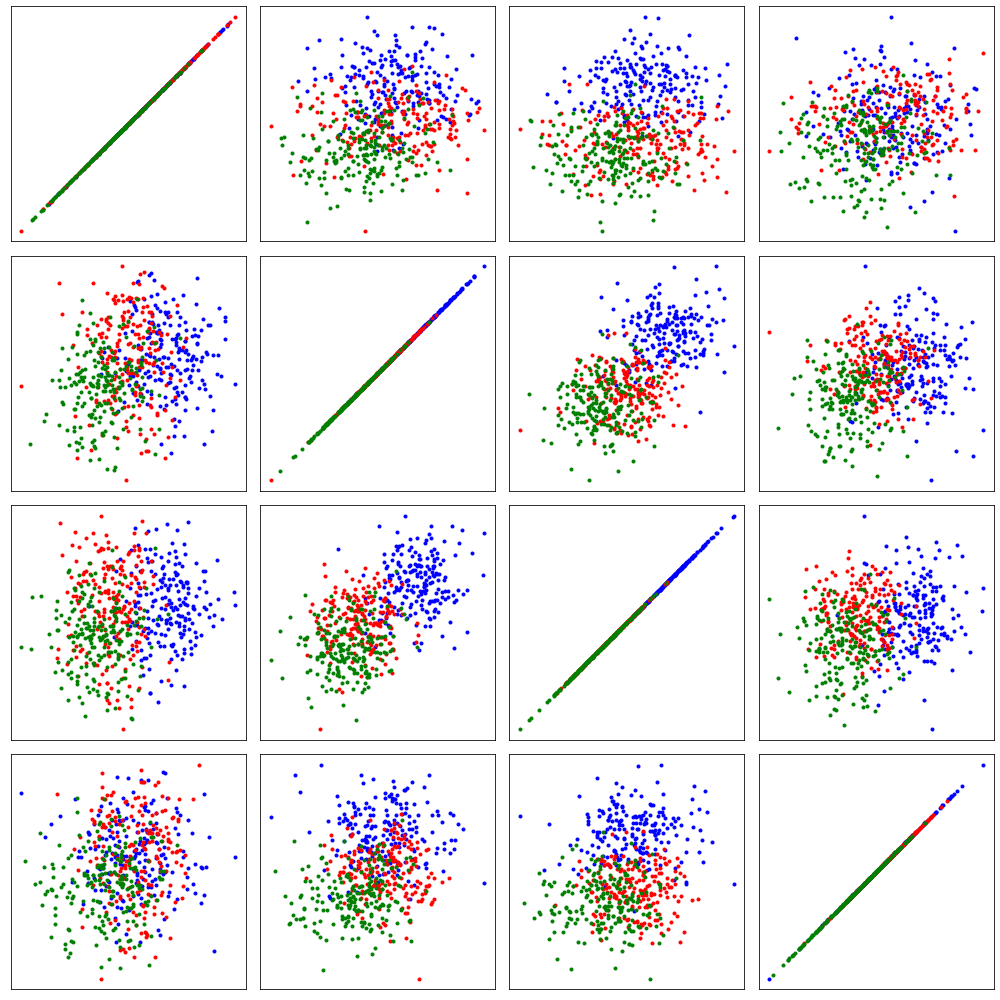

In [2]:
N = 600
T = N // 3
ROWS = 4

target = np.zeros(N)
data = np.zeros((N, ROWS))

data[:, 0] = np.random.normal(0.5, 2, N)
data[:, 1] = np.random.normal(-0.6, 0.9, N)
data[:, 2] = np.random.normal(0.3, 0.8, N)
data[:, 3] = np.random.normal(-0.6, 1.5, N)

data[T:] += (np.random.random(ROWS)-1) * 2
data[T*2:] += (np.random.random(ROWS)-1) * 2

target[T:] = 1
target[T*2:] = 2


fig, axs = plt.subplots(ROWS, ROWS, figsize=(14,14))


for j in range(ROWS):
    for k in range(ROWS):
        axs[j,k].plot(data[:T,j], data[:T,k], ".b")
        axs[j,k].plot(data[T:T*2,j], data[T:T*2:,k], ".r")
        axs[j,k].plot(data[T*2:,j], data[T*2:,k], ".g")
        axs[j,k].set_xticks([])
        axs[j,k].set_yticks([])     
        
plt.tight_layout()
plt.show()

### Training for 300 epochs, training size = 300 cases


/home/matous/Projects/anfis-pytorch/experimental.py:100: UserWarning: Using a target size (torch.Size([300, 1])) that is different to the input size (torch.Size([300, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  tot_loss = F.mse_loss(y_pred, y_actual)


epoch    0: MSE=1.78667, RMSE=1.33666 =inf%
epoch   10: MSE=1.78667, RMSE=1.33666 =inf%
epoch   20: MSE=1.78673, RMSE=1.33668 =inf%
epoch   30: MSE=1.78692, RMSE=1.33676 =inf%
epoch   40: MSE=1.78739, RMSE=1.33693 =inf%
epoch   50: MSE=1.78829, RMSE=1.33727 =inf%
epoch   60: MSE=1.78981, RMSE=1.33784 =inf%
epoch   70: MSE=1.79218, RMSE=1.33872 =inf%
epoch   80: MSE=1.79572, RMSE=1.34005 =inf%
epoch   90: MSE=1.80087, RMSE=1.34196 =inf%
epoch  100: MSE=1.80822, RMSE=1.34470 =inf%
epoch  110: MSE=1.81861, RMSE=1.34856 =inf%
epoch  120: MSE=1.83313, RMSE=1.35393 =inf%
epoch  130: MSE=1.85314, RMSE=1.36130 =inf%
epoch  140: MSE=1.88011, RMSE=1.37117 =inf%
epoch  150: MSE=1.91560, RMSE=1.38405 =inf%
epoch  160: MSE=1.96144, RMSE=1.40051 =inf%
epoch  170: MSE=2.01960, RMSE=1.42112 =inf%
epoch  180: MSE=2.09211, RMSE=1.44641 =inf%
epoch  190: MSE=2.18182, RMSE=1.47710 =inf%
epoch  200: MSE=2.28987, RMSE=1.51323 =inf%
epoch  210: MSE=2.41350, RMSE=1.55354 =inf%
epoch  220: MSE=2.54538, RMSE=1.

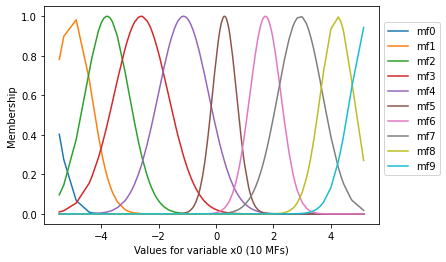

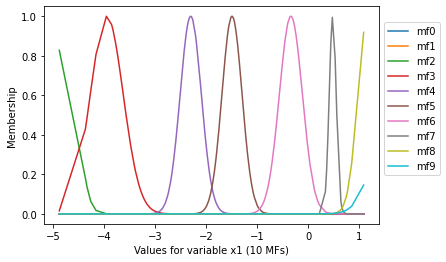

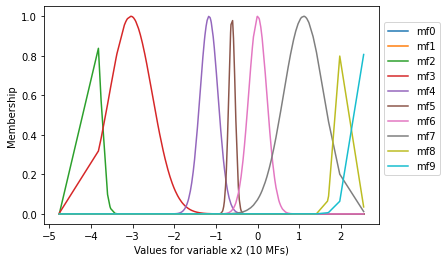

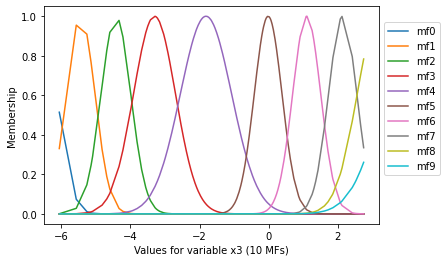

239 of 300 correct (=79.67%)


In [3]:
d = {"data": data, "target": target  }
x = torch.Tensor(d["data"])
y = torch.Tensor(d["target"]).unsqueeze(1)
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.5, random_state=2)

td = TensorDataset(x_train, y_train)
train_data = DataLoader(td, batch_size=1024, shuffle=True)

model = make_anfis(x, num_mfs=10, num_out=3, hybrid=False)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2, momentum=0.99)

def criterion(input, target):  # change the dim and type
    return torch.nn.CrossEntropyLoss()(input, target.squeeze().long())

experimental.train_anfis_with(model, train_data, optimizer, criterion, 300)
y_pred = model(x_test)
nc = torch.sum(y_test.squeeze().long() == torch.argmax(y_pred, dim=1))
tot = len(x_test)
experimental.plot_all_mfs(model, x_test)
print('{} of {} correct (={:5.2f}%)'.format(nc, tot, nc*100/tot))

## Synthetic example - 5 features, 2 classes

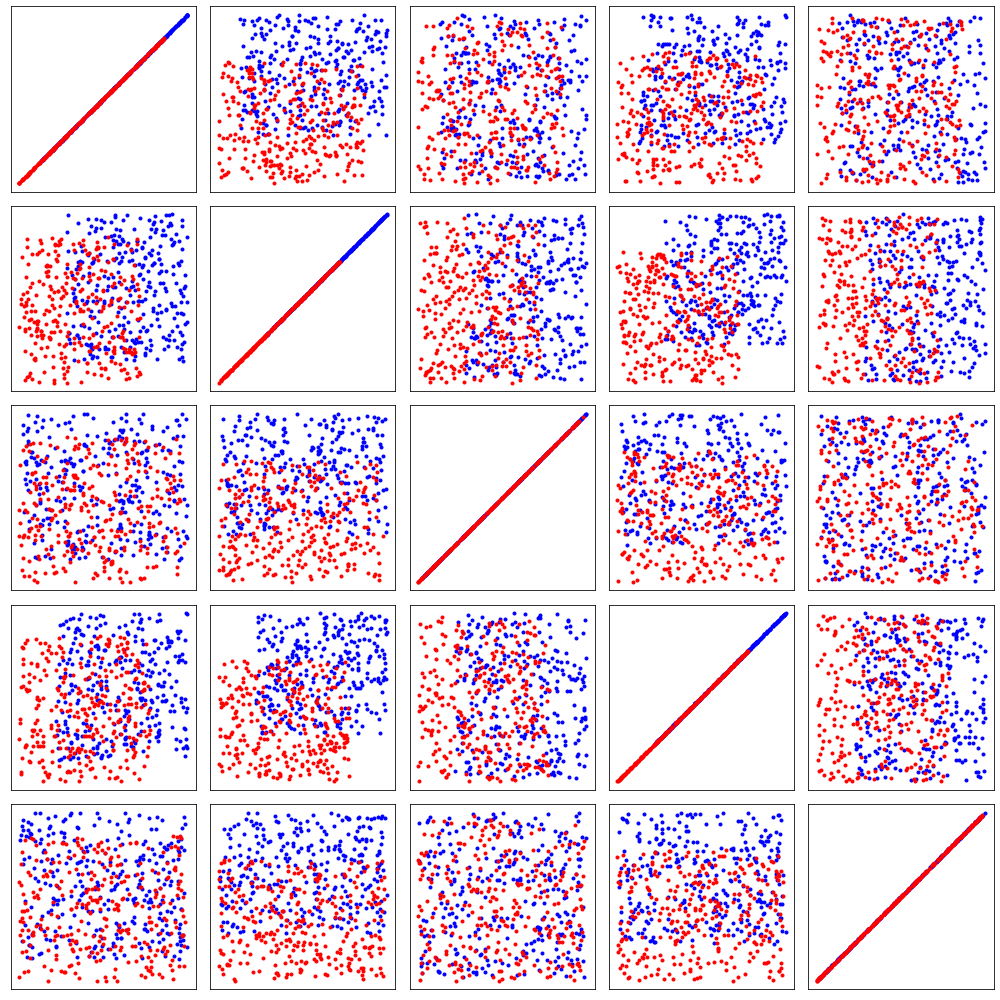

In [4]:
N = 600
T = N // 2
ROWS = 5

target = np.zeros(N)
data = np.zeros((N, ROWS))

data[:, 0] = np.random.uniform(-1, 2, N)
data[:, 1] = np.random.uniform(-0.5, 0.5, N)
data[:, 2] = np.random.uniform(-2, 0, N)
data[:, 3] = np.random.uniform(0.5, 2, N)
data[:, 4] = np.random.uniform(-2, 2.5, N)

data[T:]  += (np.random.random(ROWS)-1) * 0.5


target[T:] = 1



fig, axs = plt.subplots(ROWS, ROWS, figsize=(14,14))


for j in range(ROWS):
    for k in range(ROWS):
        axs[j,k].plot(data[:T,j], data[:T,k], ".b")
        axs[j,k].plot(data[T:,j], data[T:T*2:,k], ".r")
        axs[j,k].set_xticks([])
        axs[j,k].set_yticks([])     
        
plt.tight_layout()
plt.show()

### Training for 300 epochs, training size = 300 cases


/home/matous/Projects/anfis-pytorch/experimental.py:100: UserWarning: Using a target size (torch.Size([300, 1])) that is different to the input size (torch.Size([300, 2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  tot_loss = F.mse_loss(y_pred, y_actual)


epoch    0: MSE=0.52000, RMSE=0.72111 =inf%
epoch   10: MSE=0.52000, RMSE=0.72111 =inf%
epoch   20: MSE=0.52000, RMSE=0.72111 =inf%
epoch   30: MSE=0.52000, RMSE=0.72111 =inf%
epoch   40: MSE=0.52001, RMSE=0.72112 =inf%
epoch   50: MSE=0.52002, RMSE=0.72112 =inf%
epoch   60: MSE=0.52004, RMSE=0.72114 =inf%
epoch   70: MSE=0.52006, RMSE=0.72115 =inf%
epoch   80: MSE=0.52010, RMSE=0.72118 =inf%
epoch   90: MSE=0.52016, RMSE=0.72122 =inf%
epoch  100: MSE=0.52023, RMSE=0.72127 =inf%
epoch  110: MSE=0.52033, RMSE=0.72134 =inf%
epoch  120: MSE=0.52046, RMSE=0.72143 =inf%
epoch  130: MSE=0.52063, RMSE=0.72155 =inf%
epoch  140: MSE=0.52086, RMSE=0.72171 =inf%
epoch  150: MSE=0.52117, RMSE=0.72192 =inf%
epoch  160: MSE=0.52160, RMSE=0.72222 =inf%
epoch  170: MSE=0.52217, RMSE=0.72262 =inf%
epoch  180: MSE=0.52297, RMSE=0.72316 =inf%
epoch  190: MSE=0.52397, RMSE=0.72385 =inf%
epoch  200: MSE=0.52520, RMSE=0.72470 =inf%
epoch  210: MSE=0.52692, RMSE=0.72589 =inf%
epoch  220: MSE=0.52929, RMSE=0.

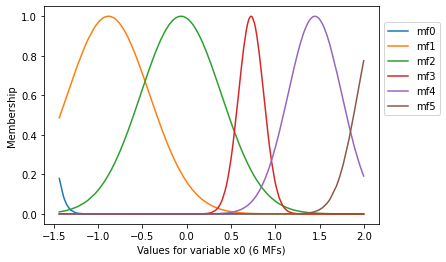

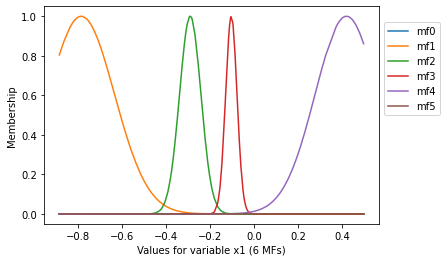

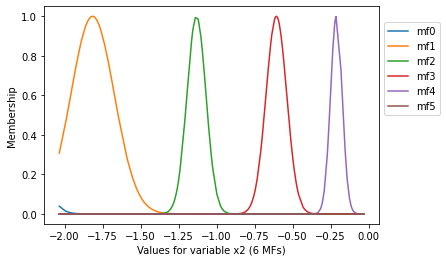

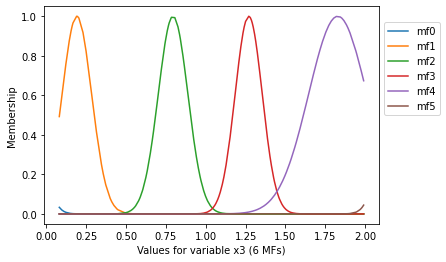

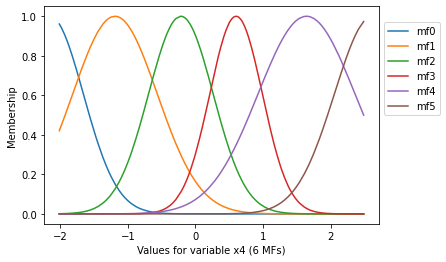

230 of 300 correct (=76.67%)


In [5]:
d = {"data": data, "target": target  }
x = torch.Tensor(d["data"])
y = torch.Tensor(d["target"]).unsqueeze(1)
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.5, random_state=2)

td = TensorDataset(x_train, y_train)
train_data = DataLoader(td, batch_size=1024, shuffle=True)

model = make_anfis(x, num_mfs=6, num_out=2, hybrid=False)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2, momentum=0.99)

def criterion(input, target):  # change the dim and type
    return torch.nn.CrossEntropyLoss()(input, target.squeeze().long())

experimental.train_anfis_with(model, train_data, optimizer, criterion, 300)
y_pred = model(x_test)
nc = torch.sum(y_test.squeeze().long() == torch.argmax(y_pred, dim=1))
tot = len(x_test)
experimental.plot_all_mfs(model, x_test)
print('{} of {} correct (={:5.2f}%)'.format(nc, tot, nc*100/tot))

## Synthetic example - 5 features, 6 classes

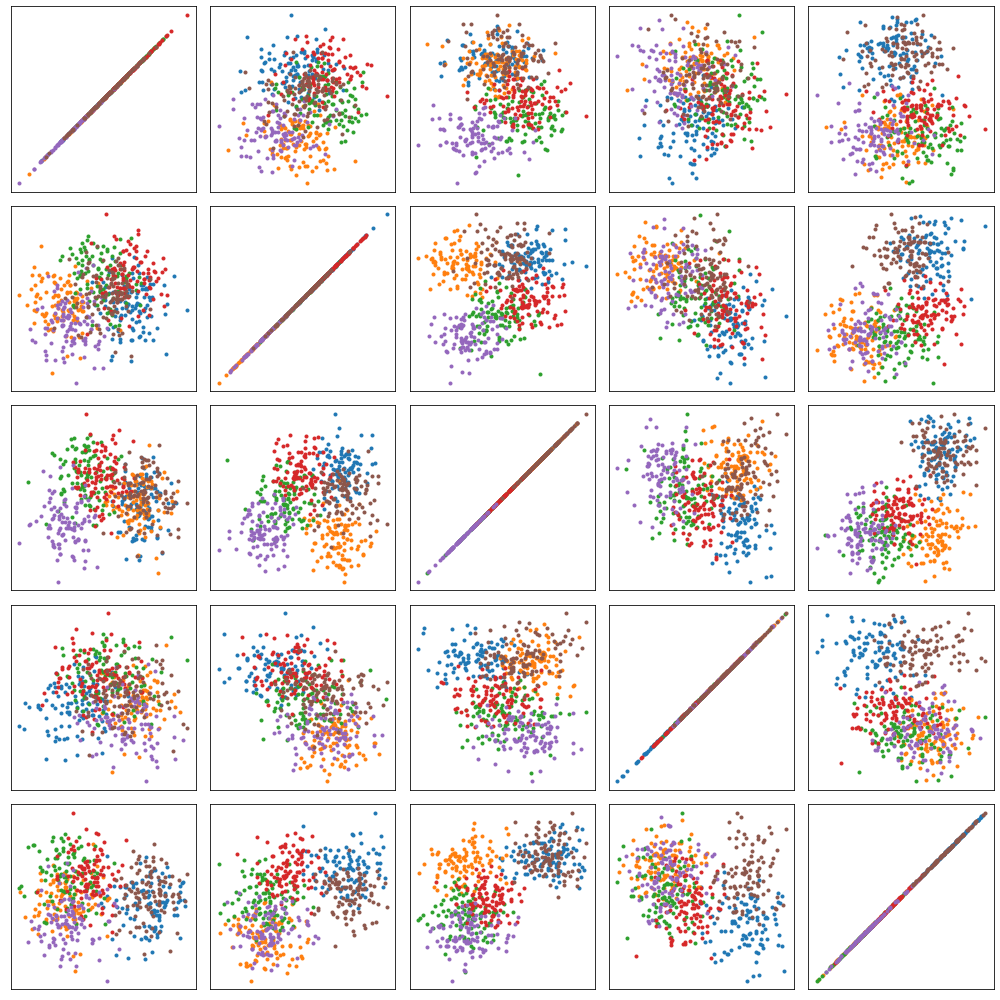

In [12]:
N = 600
T = N // 6
ROWS = 5

target = np.zeros(N) 
data = np.zeros((N, ROWS))

data[:, 0] = np.random.normal(0.5, 2, N)
data[:, 1] = np.random.normal(-0.6, 0.9, N)
data[:, 2] = np.random.normal(0.3, 0.8, N)
data[:, 3] = np.random.normal(-0.6, 1.5, N)
data[:, 4] = np.random.normal(-0.3, 1, N)


for t in range(6):
    data[t*T:(t+1)*T] += (np.random.random(ROWS)-1) * 5
    target[t*T:(t+1)*T] = t


    
fig, axs = plt.subplots(ROWS, ROWS, figsize=(14,14))


for j in range(ROWS):
    for k in range(ROWS):
        for t in range(6):
            axs[j,k].plot(data[t*T:(t+1)*T,j], data[t*T:(t+1)*T,k], ".")

        axs[j,k].set_xticks([])
        axs[j,k].set_yticks([])     
        
plt.tight_layout()
plt.show()

### Training for 300 epochs, training size = 300 cases
epoch    0: MSE=9.73333, RMSE=3.11983 =inf%
epoch   10: MSE=9.73351, RMSE=3.11986 =inf%
epoch   20: MSE=9.73532, RMSE=3.12015 =inf%
epoch   30: MSE=9.74184, RMSE=3.12119 =inf%
epoch   40: MSE=9.75728, RMSE=3.12367 =inf%
epoch   50: MSE=9.78704, RMSE=3.12843 =inf%
epoch   60: MSE=9.83839, RMSE=3.13662 =inf%
epoch   70: MSE=9.92212, RMSE=3.14994 =inf%
epoch   80: MSE=10.05530, RMSE=3.17101 =inf%
epoch   90: MSE=10.26540, RMSE=3.20397 =inf%
epoch  100: MSE=10.59543, RMSE=3.25506 =inf%
epoch  110: MSE=11.10652, RMSE=3.33265 =inf%
epoch  120: MSE=11.87063, RMSE=3.44538 =inf%
epoch  130: MSE=12.95228, RMSE=3.59893 =inf%
epoch  140: MSE=14.39386, RMSE=3.79392 =inf%
epoch  150: MSE=16.21651, RMSE=4.02697 =inf%
epoch  160: MSE=18.41654, RMSE=4.29145 =inf%
epoch  170: MSE=20.83296, RMSE=4.56431 =inf%
epoch  180: MSE=23.16591, RMSE=4.81310 =inf%
epoch  190: MSE=25.21268, RMSE=5.02122 =inf%
epoch  200: MSE=27.09713, RMSE=5.20549 =inf%
epoch  2

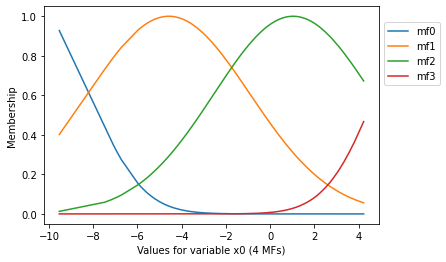

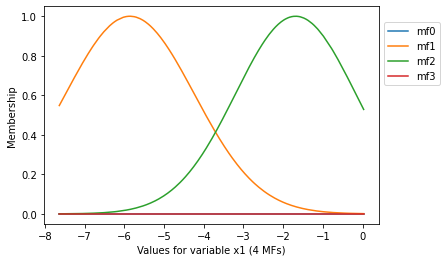

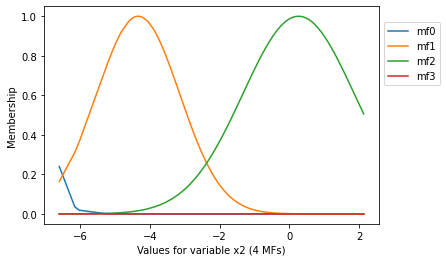

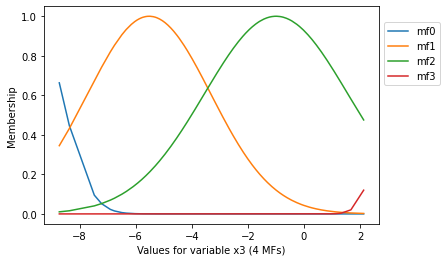

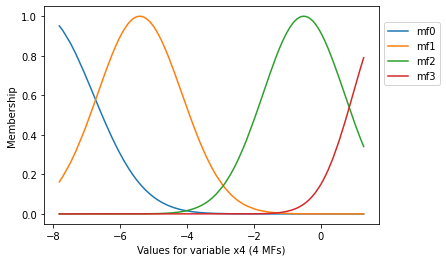

259 of 300 correct (=86.33%)


In [14]:
d = {"data": data, "target": target  }
x = torch.Tensor(d["data"])
y = torch.Tensor(d["target"]).unsqueeze(1)
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.5, random_state=2)

td = TensorDataset(x_train, y_train)
train_data = DataLoader(td, batch_size=1024, shuffle=True)

model = make_anfis(x, num_mfs=4, num_out=6, hybrid=False)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2, momentum=0.99)

def criterion(input, target):  # change the dim and type
    return torch.nn.CrossEntropyLoss()(input, target.squeeze().long())

experimental.train_anfis_with(model, train_data, optimizer, criterion, 300)
y_pred = model(x_test)
nc = torch.sum(y_test.squeeze().long() == torch.argmax(y_pred, dim=1))
tot = len(x_test)
experimental.plot_all_mfs(model, x_test)
print('{} of {} correct (={:5.2f}%)'.format(nc, tot, nc*100/tot))